# Income Qualification

DESCRIPTION

Identify the level of income qualification needed for the families in Latin America.

Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.
Following actions should be performed:

Identify the output variable.
Understand the type of data.
Check if there are any biases in your dataset.
Check whether all members of the house have the same poverty level.
Check if there is a house without a family head.
Set poverty level of the members and the head of the house within a family.
Count how many null values are existing in columns.
Remove null value rows of the target variable.
Predict the accuracy using random forest classifier.
Check the accuracy using random forest with cross validation.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
%config IPCompleter.greedy=True

## Load Training Dataset

In [137]:
dataset = pd.read_csv("PGP_ML_train.csv")

In [138]:
dataset.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [139]:
dataset.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [140]:
dataset.shape

(9557, 143)

## Check Null in the Traning Dataset

In [141]:
dataset.isna().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
refrig                0
v18q                  0
v18q1              7342
r4h1                  0
r4h2                  0
r4h3                  0
r4m1                  0
r4m2                  0
r4m3                  0
r4t1                  0
r4t2                  0
r4t3                  0
tamhog                0
tamviv                0
escolari              0
rez_esc            7928
hhsize                0
paredblolad           0
paredzocalo           0
paredpreb             0
pareddes              0
paredmad              0
paredzinc             0
paredfibras           0
                   ... 
bedrooms              0
overcrowding          0
tipovivi1             0
tipovivi2             0
tipovivi3             0
tipovivi4             0
tipovivi5             0
computer              0
television            0
mobilephone           0
qmobilephone    

In [142]:
NullDataCol = dataset.isnull().sum()
NullDataCol[NullDataCol>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

### Fix null values of the columns 'v18q1'

In [143]:
v18q1NullData = dataset[dataset['v18q1'].isna()]
v18q1NullData

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.000000,100.00000,1849,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.000000,121.00000,8464,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,...,0,49,16,81,4,16.000000,1.000000,100.00000,49,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,...,81,900,16,81,4,16.000000,1.000000,100.00000,900,4
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,NaN,0,...,121,784,16,81,4,16.000000,1.000000,100.00000,784,4
10,ID_db44f5c59,130000.0,1,2,0,1,1,0,NaN,0,...,9,121,16,81,4,16.000000,1.000000,100.00000,121,4
11,ID_de822510c,100000.0,0,3,0,1,1,0,NaN,0,...,144,324,4,0,1,1.000000,1.000000,529.00000,324,4
12,ID_d94071d7c,100000.0,0,3,0,1,1,0,NaN,0,...,121,1156,4,0,1,1.000000,1.000000,529.00000,1156,4
15,ID_0a39e419e,90000.0,1,2,0,1,1,0,NaN,0,...,121,361,16,0,4,16.000000,9.000000,289.00000,361,4
16,ID_4ff51f90c,90000.0,1,2,0,1,1,0,NaN,0,...,4,4900,16,0,4,16.000000,9.000000,289.00000,4900,4


In [144]:
dataset['v18q1'] = dataset['v18q1'].fillna(0)

In [145]:
dataset['v18q1'].unique()

array([0., 1., 2., 3., 4., 5., 6.])

In [146]:
NullDataCol = dataset.isnull().sum()
NullDataCol[NullDataCol>0]

v2a1         6860
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

### Check unique values of 'escolari'

In [147]:
dataset['escolari'].unique()

array([10, 12, 11,  9,  2,  0,  3,  4, 15, 16,  6, 13,  8,  1, 17,  7, 14,
        5, 21, 19, 18, 20], dtype=int64)

### Fix null values of the columns 'v2a1'

In [148]:
count = 0
for i in range(len(dataset['v2a1'])):
    if pd.isnull(dataset['v2a1'].iloc[i]):
        if dataset['tipovivi1'].iloc[i] == 0:
            if dataset['tipovivi2'].iloc[i] == 0:
                #print(dataset['v2a1'].iloc[i], dataset['tipovivi1'].iloc[i])
                count = count + 1
print (count)

949


In [149]:
dataset['v2a1'] = dataset['v2a1'].fillna(0)

In [150]:
nullCounts = dataset.isnull().sum()
nullCounts[nullCounts>0]

rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

## Identifying Target variable 

In [151]:
dataset["Target"].unique()

array([4, 2, 3, 1], dtype=int64)

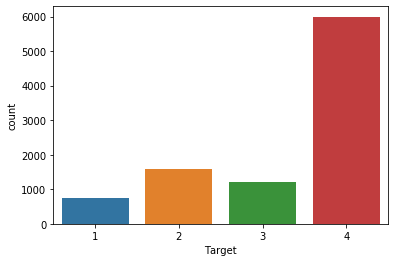

In [152]:
sns.countplot(dataset.Target)

In [153]:
np.bincount(dataset.Target)

array([   0,  755, 1597, 1209, 5996], dtype=int64)

#Identify the output variable.
#The output variable is the Target
#Understand the type of data.
#Check if there are any biases in your dataset.
#Yes the dataset is biases leaning towards the high income group

In [154]:
nullCounts = dataset.isnull().sum()
nullCounts[nullCounts>0]

rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

### Fix null values of the columns 'meaneduc' and 'SQBmeaned'

In [155]:
dataset['meaneduc'] = dataset['meaneduc'].fillna(0)
dataset['SQBmeaned'] = dataset['SQBmeaned'].fillna(0)

In [156]:
nullCounts = dataset.isnull().sum()
nullCounts[nullCounts>0]

rez_esc    7928
dtype: int64

### Fix null values of the columns 'rez_esc'

In [157]:
count = 0
for i in range(len(dataset.hogar_nin)):
    if dataset.hogar_nin.iloc[i] == 0 or dataset.instlevel1.iloc[i] == 1 or dataset.instlevel2.iloc[i] == 1 or dataset.instlevel3.iloc[i] == 1:
        if dataset.rez_esc.isnull().iloc[i]:
            count = count +1
print(count)

5476


In [158]:
filterData = dataset.loc[dataset['hogar_nin'] == 0]
filterData = filterData.loc[filterData['instlevel1'] == 0]
filterData = filterData.loc[filterData['instlevel2'] == 0]
filterData = filterData.loc[filterData['instlevel3'] == 0]
filterData = filterData.loc[filterData['instlevel4'] == 0]
filterData = filterData.loc[filterData['instlevel5'] == 0]
filterData = filterData.loc[filterData['instlevel6'] == 0]
filterData = filterData.loc[filterData['instlevel7'] == 0]
filterData = filterData.loc[filterData['instlevel8'] == 0]
filterData = filterData.loc[filterData['instlevel9'] == 0]

In [159]:
FilterCol = ["hogar_nin", "instlevel1",  "instlevel2",  "instlevel3",  "instlevel3",  "instlevel3",  "instlevel3",  "instlevel4",  "instlevel5",  "instlevel6",  "instlevel7",  "instlevel8",  "instlevel9", "SQBhogar_nin", "rez_esc"]

In [160]:
for col in range(len(filterData.columns)):
    if (len(filterData[filterData.columns[col]].unique())) == 1:
        if filterData.columns[col] not in FilterCol: 
            print (filterData.columns[col], filterData[filterData.columns[col]].unique())

Id ['ID_5994b8a31']
v2a1 [0.]
hacdor [0]
rooms [5]
hacapo [0]
v14a [1]
refrig [1]
v18q [0]
v18q1 [0.]
r4h1 [0]
r4h2 [1]
r4h3 [1]
r4m1 [0]
r4m2 [1]
r4m3 [1]
r4t1 [0]
r4t2 [2]
r4t3 [2]
tamhog [2]
tamviv [2]
escolari [0]
hhsize [2]
paredblolad [0]
paredzocalo [0]
paredpreb [0]
pareddes [0]
paredmad [1]
paredzinc [0]
paredfibras [0]
paredother [0]
pisomoscer [1]
pisocemento [0]
pisoother [0]
pisonatur [0]
pisonotiene [0]
pisomadera [0]
techozinc [1]
techoentrepiso [0]
techocane [0]
techootro [0]
cielorazo [1]
abastaguadentro [1]
abastaguafuera [0]
abastaguano [0]
public [1]
planpri [0]
noelec [0]
coopele [0]
sanitario1 [0]
sanitario2 [0]
sanitario3 [1]
sanitario5 [0]
sanitario6 [0]
energcocinar1 [0]
energcocinar2 [1]
energcocinar3 [0]
energcocinar4 [0]
elimbasu1 [1]
elimbasu2 [0]
elimbasu3 [0]
elimbasu4 [0]
elimbasu5 [0]
elimbasu6 [0]
epared1 [0]
epared2 [0]
epared3 [1]
etecho1 [0]
etecho2 [0]
etecho3 [1]
eviv1 [0]
eviv2 [0]
eviv3 [1]
dis [1]
male [0]
female [1]
estadocivil1 [0]
estadocivi

In [161]:
filterData

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
6728,ID_5994b8a31,0.0,0,5,0,1,1,0,0.0,0,...,0,9409,4,64,0,4.0,1.0,16.0,9409,3


In [162]:
dataset['rez_esc'] = dataset['rez_esc'].fillna(0)
nullCounts = dataset.isnull().sum()
nullCounts[nullCounts>0]

Series([], dtype: int64)

## Check if there is a house without a family head.

In [163]:
counter = 0
for item in dataset.idhogar.unique():
    head = dataset[dataset['idhogar']==item]['parentesco1'].sum()
    if head == 0:
        counter = counter + 1
print (counter)

15


## Features Selection

In [164]:
for col in range(len(dataset.columns)):
    if (len(dataset[dataset.columns[col]].unique())) == 1:
        print (dataset.columns[col], dataset[filterData.columns[col]].unique())

elimbasu5 [0]


In [165]:
dataset = dataset.drop(['elimbasu5'], axis=1)

In [166]:
dataset

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,1849,1,100,0,1.000000,0.000000,100.000000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.000000,144.000000,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,121,8464,1,0,0,0.250000,64.000000,121.000000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.000000,121.000000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.000000,121.000000,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.000000,121.000000,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.000000,121.000000,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,0.0,0,...,0,49,16,81,4,16.000000,1.000000,100.000000,49,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,0.0,0,...,81,900,16,81,4,16.000000,1.000000,100.000000,900,4
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,0.0,0,...,121,784,16,81,4,16.000000,1.000000,100.000000,784,4


## Check whether all members of the house have the same poverty level.

In [167]:
ClassCount = dataset.groupby('idhogar')['Target'].nunique()

In [168]:
print(ClassCount[ClassCount>1])

idhogar
0172ab1d9    2
03f4e5f4d    2
0511912b6    2
078a0b6e2    2
09e25d616    2
0f3e65c83    2
0f9494d3a    2
15a891635    2
17fb04a62    2
18832b840    2
26b3a0f41    2
288579c97    2
28893b5e7    2
2c9872b82    2
2cb443214    2
309fb7246    2
30a70901d    2
3c6973219    2
3c73c107f    2
3df651058    2
3fe29a56b    2
410194c8b    2
417865404    2
42ec8bef5    2
43b9c83e5    2
44f219a16    2
46af47063    2
4b6077882    2
4c2dba109    2
4dc11e11f    2
            ..
80a66379b    2
811a35744    2
8242a51ec    2
8420bcfca    2
8ae3e74ca    2
8bb6da3c1    2
932287f5d    2
9bbf7c6ca    2
a20ff33ba    2
a3288e6fa    2
a94a45642    2
bcaa2e2f5    2
bcab69521    2
bd82509d1    2
be91da044    2
c13325faf    2
c38913488    2
c7ce4e30c    2
cc971b690    2
d64524b6b    2
d9b1558b5    2
daafc1281    2
dfb966eec    2
e17b252ed    2
e235a4eec    2
e65d4b943    2
efd3aec61    2
f006348ed    2
f7b421c2c    2
f94589d38    2
Name: Target, Length: 85, dtype: int64


In [169]:
for hid in dataset.idhogar.unique():
    if dataset[dataset["idhogar"]==hid].Target.nunique() > 1:
        print("\n________________")
        print(hid)
        print("________________")
        for tid in dataset[dataset["idhogar"]==hid].Id:
            print(str(tid) + " -- " + str(dataset[dataset["Id"]==tid].Target.values) + "--" + str(max(dataset[dataset["idhogar"]==hid].Target)))
            dataset[dataset["Id"]==tid].Target = dataset[dataset["idhogar"]==hid].Target


________________
4b6077882
________________
ID_b1fb0180e -- [1]--2


C:\Users\saaim\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


ID_17d9dcd44 -- [2]--2
ID_e78621924 -- [2]--2

________________
6833ac5dc
________________
ID_2be4f2db1 -- [2]--2
ID_1c3ec2768 -- [2]--2
ID_b859b2f59 -- [2]--2
ID_4f08bbe09 -- [2]--2
ID_6dea84d09 -- [2]--2
ID_606ed140f -- [1]--2

________________
43b9c83e5
________________
ID_474ec6c27 -- [2]--2
ID_040ee5484 -- [2]--2
ID_ce4fbd3f1 -- [2]--2
ID_b574afc28 -- [2]--2
ID_dab0d86a2 -- [1]--2
ID_6e8c57bc1 -- [2]--2

________________
5c3f7725d
________________
ID_7d5b483e6 -- [3]--3
ID_16669b3ac -- [3]--3
ID_14b967c3b -- [3]--3
ID_aa0e92ddc -- [3]--3
ID_0f28c8bfa -- [2]--3
ID_58f843774 -- [2]--3
ID_6895c3ee3 -- [3]--3

________________
0f9494d3a
________________
ID_60d38257d -- [2]--3
ID_f4771f1f6 -- [2]--3
ID_be5ce5711 -- [3]--3
ID_0c8772eb6 -- [3]--3
ID_69658f54a -- [3]--3

________________
daafc1281
________________
ID_19f83c2e1 -- [2]--3
ID_00a3edd2a -- [3]--3
ID_8fcf15bbf -- [3]--3
ID_0a87d066d -- [3]--3

________________
73d85d05d
________________
ID_5171608a1 -- [2]--3
ID_028c28215 -- [

ID_bf56eb3d9 -- [2]--2
ID_f8f357aae -- [2]--2
ID_91adf2513 -- [1]--2

________________
564eab113
________________
ID_1bce286a0 -- [2]--2
ID_2253be13c -- [1]--2
ID_9301989ae -- [2]--2

________________
8242a51ec
________________
ID_09d4f095a -- [3]--3
ID_85b19e595 -- [3]--3
ID_3a909ba30 -- [2]--3
ID_85a4b4732 -- [3]--3

________________
0172ab1d9
________________
ID_a5e2b0639 -- [3]--3
ID_5dfdf4ebe -- [2]--3
ID_762e1fd96 -- [3]--3
ID_c76b87004 -- [3]--3
ID_1dffe3dcf -- [2]--3

________________
a94a45642
________________
ID_764616de3 -- [2]--2
ID_12fae1b03 -- [1]--2
ID_4560bb792 -- [2]--2

________________
be91da044
________________
ID_4625948fc -- [2]--3
ID_133aa93b8 -- [3]--3

________________
50e064ee8
________________
ID_7faef72ec -- [3]--3
ID_c47844d30 -- [2]--3
ID_5dc1ace3e -- [3]--3
ID_13b2e197d -- [3]--3

________________
4c2dba109
________________
ID_7cae6f9fc -- [3]--3
ID_4bd902ea2 -- [3]--3
ID_6953e4997 -- [2]--3

________________
7ad269eef
________________
ID_8de7eec2f -- [2]

In [170]:
#for hid in dataset.idhogar.unique():
 #   if dataset[dataset["idhogar"]==hid].Target.nunique() > 1:
  #      for tid in dataset[dataset["idhogar"]==hid].Id:
            #dataset[dataset["Id"]==tid].Target = dataset[dataset["idhogar"]==hid].Target

## Set poverty level of the members and the head of the house within a family.

In [171]:
for hid in dataset.idhogar.unique():
    if dataset[dataset["idhogar"]==hid].Target.nunique() > 1:
        print("\n________________")
        print(hid)
        print("________________")
        for tid in dataset[dataset["idhogar"]==hid].Id:
            print(str(tid) + " -- " + str(dataset[dataset["Id"]==tid].Target.values) + "--" + str(round(dataset[dataset["idhogar"]==hid].Target.mean())))
            dataset[dataset["Id"]==tid].Target = round(dataset[dataset["idhogar"]==hid].Target.mean())


________________
4b6077882
________________
ID_b1fb0180e -- [1]--2
ID_17d9dcd44 -- [2]--2
ID_e78621924 -- [2]--2

________________
6833ac5dc
________________
ID_2be4f2db1 -- [2]--2
ID_1c3ec2768 -- [2]--2
ID_b859b2f59 -- [2]--2
ID_4f08bbe09 -- [2]--2
ID_6dea84d09 -- [2]--2
ID_606ed140f -- [1]--2

________________
43b9c83e5
________________
ID_474ec6c27 -- [2]--2
ID_040ee5484 -- [2]--2
ID_ce4fbd3f1 -- [2]--2
ID_b574afc28 -- [2]--2
ID_dab0d86a2 -- [1]--2
ID_6e8c57bc1 -- [2]--2

________________
5c3f7725d
________________
ID_7d5b483e6 -- [3]--3
ID_16669b3ac -- [3]--3
ID_14b967c3b -- [3]--3
ID_aa0e92ddc -- [3]--3
ID_0f28c8bfa -- [2]--3
ID_58f843774 -- [2]--3
ID_6895c3ee3 -- [3]--3

________________
0f9494d3a
________________
ID_60d38257d -- [2]--3
ID_f4771f1f6 -- [2]--3
ID_be5ce5711 -- [3]--3
ID_0c8772eb6 -- [3]--3
ID_69658f54a -- [3]--3

________________
daafc1281
________________
ID_19f83c2e1 -- [2]--3
ID_00a3edd2a -- [3]--3
ID_8fcf15bbf -- [3]--3
ID_0a87d066d -- [3]--3

________________

ID_bfa223425 -- [2]--2

________________
09e25d616
________________
ID_7e24baf68 -- [2]--2
ID_bf56eb3d9 -- [2]--2
ID_f8f357aae -- [2]--2
ID_91adf2513 -- [1]--2

________________
564eab113
________________
ID_1bce286a0 -- [2]--2
ID_2253be13c -- [1]--2
ID_9301989ae -- [2]--2

________________
8242a51ec
________________
ID_09d4f095a -- [3]--3
ID_85b19e595 -- [3]--3
ID_3a909ba30 -- [2]--3
ID_85a4b4732 -- [3]--3

________________
0172ab1d9
________________
ID_a5e2b0639 -- [3]--3
ID_5dfdf4ebe -- [2]--3
ID_762e1fd96 -- [3]--3
ID_c76b87004 -- [3]--3
ID_1dffe3dcf -- [2]--3

________________
a94a45642
________________
ID_764616de3 -- [2]--2
ID_12fae1b03 -- [1]--2
ID_4560bb792 -- [2]--2

________________
be91da044
________________
ID_4625948fc -- [2]--2
ID_133aa93b8 -- [3]--2

________________
50e064ee8
________________
ID_7faef72ec -- [3]--3
ID_c47844d30 -- [2]--3
ID_5dc1ace3e -- [3]--3
ID_13b2e197d -- [3]--3

________________
4c2dba109
________________
ID_7cae6f9fc -- [3]--3
ID_4bd902ea2 -- [3]

## Check for Boolean columns

In [172]:
for col in range(len(dataset.columns)):
    if (len(dataset[dataset.columns[col]].unique())) == 2:
        print (dataset.columns[col], dataset[dataset.columns[col]].unique())

hacdor [0 1]
hacapo [0 1]
v14a [1 0]
refrig [1 0]
v18q [0 1]
paredblolad [1 0]
paredzocalo [0 1]
paredpreb [0 1]
pareddes [0 1]
paredmad [0 1]
paredzinc [0 1]
paredfibras [0 1]
paredother [0 1]
pisomoscer [1 0]
pisocemento [0 1]
pisoother [0 1]
pisonatur [0 1]
pisonotiene [0 1]
pisomadera [0 1]
techozinc [0 1]
techoentrepiso [1 0]
techocane [0 1]
techootro [0 1]
cielorazo [1 0]
abastaguadentro [1 0]
abastaguafuera [0 1]
abastaguano [0 1]
public [1 0]
planpri [0 1]
noelec [0 1]
coopele [0 1]
sanitario1 [0 1]
sanitario2 [1 0]
sanitario3 [0 1]
sanitario5 [0 1]
sanitario6 [0 1]
energcocinar1 [0 1]
energcocinar2 [0 1]
energcocinar3 [1 0]
energcocinar4 [0 1]
elimbasu1 [1 0]
elimbasu2 [0 1]
elimbasu3 [0 1]
elimbasu4 [0 1]
elimbasu6 [0 1]
epared1 [0 1]
epared2 [1 0]
epared3 [0 1]
etecho1 [1 0]
etecho2 [0 1]
etecho3 [0 1]
eviv1 [1 0]
eviv2 [0 1]
eviv3 [0 1]
dis [0 1]
male [1 0]
female [0 1]
estadocivil1 [0 1]
estadocivil2 [0 1]
estadocivil3 [0 1]
estadocivil4 [1 0]
estadocivil5 [0 1]
estadocivi

## Check for continues variables 

In [173]:
for col in range(len(dataset.columns)):
    if (len(dataset[dataset.columns[col]].unique())) > 2:
        print (dataset.columns[col], dataset[dataset.columns[col]].unique())

Id ['ID_279628684' 'ID_f29eb3ddd' 'ID_68de51c94' ... 'ID_85fc658f8'
 'ID_ced540c61' 'ID_a38c64491']
v2a1 [ 190000.  135000.       0.  180000.  130000.  100000.   90000.  215000.
  150000.  120000.   80000.  168000.   40000.  155000.  200000.  350000.
  270000.  300000.  250000.  260000.  564834.  175000.   25310.  400000.
  450000.  399378.  119813.  125518.  125000.   60000.   35000.  160000.
  170000.  500000.  230000.  185000.  220000.  570540.  342324.  127000.
   52000.  240000.  278000.   70000.  110000.  100297.  210000.  770229.
  285270.  145000.   96000.  542013.   65000.   85000.  104000.  275000.
  140000.  280000.  105661.   20000.   16000.   55000.   30000.  283000.
  245000.  191500.  510000.   36350.   89000.  600000.   75000.   50000.
   84529.  550000.  132000.  470000.   27000.  176000.  205000.  380000.
  855810.  427905.  290975.  188000.  118097.  360000.  325000. 1000000.
  700000.  288750.  219087.   95000.   93000.  800000.  456432.  142635.
   97000.   51000. 

## Convert the string to numaric

In [174]:
dataset[dataset['dependency']=="no"]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,1849,1,100,0,1.000000,0.0,100.000000,1849,4
19,ID_35b66f7c6,215000.0,0,4,0,1,1,0,0.0,0,...,144,484,4,225,0,1.000000,0.0,182.250000,484,4
20,ID_74a2bc523,215000.0,0,4,0,1,1,0,0.0,0,...,225,676,4,225,0,1.000000,0.0,182.250000,676,4
23,ID_848b0fdf1,100000.0,1,1,1,0,1,0,0.0,0,...,36,1681,9,36,0,9.000000,0.0,106.777770,1681,4
24,ID_298d857e5,100000.0,1,1,1,0,1,0,0.0,0,...,169,400,9,36,0,9.000000,0.0,106.777770,400,4
25,ID_1d5bf8ddf,100000.0,1,1,1,0,1,0,0.0,0,...,144,1600,9,36,0,9.000000,0.0,106.777770,1600,4
26,ID_e5cdba865,0.0,0,5,0,1,1,0,0.0,0,...,225,1936,1,225,0,0.250000,0.0,225.000000,1936,4
30,ID_96b1fbc81,100000.0,0,5,0,1,1,0,0.0,0,...,64,1225,4,64,0,1.000000,0.0,90.250000,1225,4
31,ID_422226730,100000.0,0,5,0,1,1,0,0.0,0,...,121,784,4,64,0,1.000000,0.0,90.250000,784,4
40,ID_488b8ac27,90000.0,0,5,0,1,1,1,1.0,0,...,81,1936,4,0,0,1.000000,0.0,121.000000,1936,4


In [175]:
dataset = dataset.replace("no", "0")

In [176]:
dataset = dataset.replace("yes", "1")

In [177]:
for col in range(len(dataset.columns)):
    if (len(dataset[dataset.columns[col]].unique())) > 2:
        print (dataset.columns[col], dataset[dataset.columns[col]].unique())

Id ['ID_279628684' 'ID_f29eb3ddd' 'ID_68de51c94' ... 'ID_85fc658f8'
 'ID_ced540c61' 'ID_a38c64491']
v2a1 [ 190000.  135000.       0.  180000.  130000.  100000.   90000.  215000.
  150000.  120000.   80000.  168000.   40000.  155000.  200000.  350000.
  270000.  300000.  250000.  260000.  564834.  175000.   25310.  400000.
  450000.  399378.  119813.  125518.  125000.   60000.   35000.  160000.
  170000.  500000.  230000.  185000.  220000.  570540.  342324.  127000.
   52000.  240000.  278000.   70000.  110000.  100297.  210000.  770229.
  285270.  145000.   96000.  542013.   65000.   85000.  104000.  275000.
  140000.  280000.  105661.   20000.   16000.   55000.   30000.  283000.
  245000.  191500.  510000.   36350.   89000.  600000.   75000.   50000.
   84529.  550000.  132000.  470000.   27000.  176000.  205000.  380000.
  855810.  427905.  290975.  188000.  118097.  360000.  325000. 1000000.
  700000.  288750.  219087.   95000.   93000.  800000.  456432.  142635.
   97000.   51000. 

## Checking Correlation 

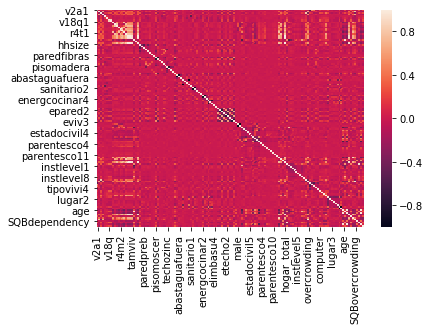

In [178]:
sns.heatmap(dataset.corr(method='pearson', min_periods=1))

In [179]:
dataset.corr(method='pearson', min_periods=1)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
v2a1,1.000000,-0.025479,0.101634,-0.030867,0.018355,0.061534,0.171947,0.196293,0.017916,-0.059021,...,0.191560,-0.106213,-0.023928,0.260639,0.009876,-0.045814,-0.073783,0.279232,-0.106213,0.166942
hacdor,-0.025479,1.000000,-0.233369,0.652594,-0.175011,-0.101965,-0.084680,-0.077992,0.232508,0.059313,...,-0.109862,-0.102725,0.350546,-0.082229,0.388043,0.794699,0.005278,-0.099007,-0.102725,-0.191714
rooms,0.101634,-0.233369,1.000000,-0.213368,0.129183,0.130531,0.254256,0.271554,-0.066578,0.267627,...,0.233679,0.068288,0.221595,0.198890,0.007952,-0.355526,-0.027575,0.250485,0.068288,0.226208
hacapo,-0.030867,0.652594,-0.213368,1.000000,-0.150986,-0.124506,-0.067529,-0.061785,0.226378,0.126645,...,-0.092703,-0.075528,0.373720,-0.071170,0.367025,0.640096,0.014411,-0.103201,-0.075528,-0.138008
v14a,0.018355,-0.175011,0.129183,-0.150986,1.000000,0.143143,0.036396,0.031774,-0.054769,0.018133,...,0.036483,0.023831,0.009100,0.018897,-0.015193,-0.174969,0.005712,0.034659,0.023831,0.063382
refrig,0.061534,-0.101965,0.130531,-0.124506,0.143143,1.000000,0.086002,0.063927,-0.047087,-0.022819,...,0.097128,0.025846,-0.052195,0.082159,-0.108718,-0.123054,-0.034080,0.117247,0.025846,0.126792
v18q,0.171947,-0.084680,0.254256,-0.067529,0.036396,0.086002,1.000000,0.849916,-0.024318,-0.014489,...,0.250477,-0.054670,-0.016430,0.282619,-0.050562,-0.125936,-0.071504,0.302959,-0.054670,0.238864
v18q1,0.196293,-0.077992,0.271554,-0.061785,0.031774,0.063927,0.849916,1.000000,0.003278,-0.002031,...,0.229343,-0.053372,0.002936,0.308742,-0.027454,-0.114650,-0.066708,0.289464,-0.053372,0.201754
r4h1,0.017916,0.232508,-0.066578,0.226378,-0.054769,-0.047087,-0.024318,0.003278,1.000000,-0.088267,...,-0.186017,-0.272690,0.441126,-0.031240,0.565494,0.355660,-0.036977,-0.083193,-0.272690,-0.229889
r4h2,-0.059021,0.059313,0.267627,0.126645,0.018133,-0.022819,-0.014489,-0.002031,-0.088267,1.000000,...,-0.017251,-0.054712,0.509087,0.077610,0.124701,0.144478,-0.157357,-0.061988,-0.054712,0.101253


In [180]:
len(dataset.idhogar.unique())

2988

## Separate the Target variable column and drop ID, idhogar

In [181]:
y = dataset.Target
dataset = dataset.drop(['Target'], axis=1)
dataset = dataset.drop(['Id'], axis=1)

In [182]:
dataset = dataset.drop(['idhogar'], axis=1)

In [183]:
datatype = dataset.dtypes

## Convert the Object to Int and Float

In [184]:
datatype[datatype != 'int64'][datatype != 'float64']

dependency    object
edjefe        object
edjefa        object
dtype: object

In [185]:
dataset.dependency.unique()

array(['0', '8', '1', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [186]:
#dataset.dependency = dataset['dependency'].astype(str)

In [187]:
dataset.dependency = dataset['dependency'].astype(float)

In [188]:
#dataset.dependency = pd.to_numeric(dataset.dependency, errors="coerce")

In [189]:
datatype = dataset.dtypes

In [190]:
datatype[datatype != 'int64'][datatype != 'float64']

edjefe    object
edjefa    object
dtype: object

In [191]:
dataset.dependency.unique()

array([0.        , 8.        , 1.        , 3.        , 0.5       ,
       0.25      , 2.        , 0.66666669, 0.33333334, 1.5       ,
       0.40000001, 0.75      , 1.25      , 0.2       , 2.5       ,
       1.2       , 4.        , 1.3333334 , 2.25      , 0.22222222,
       5.        , 0.83333331, 0.80000001, 6.        , 3.5       ,
       1.6666666 , 0.2857143 , 1.75      , 0.71428573, 0.16666667,
       0.60000002])

In [192]:
dataset.edjefe.unique()

array(['10', '12', '0', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', '1', '3', '18', '13', '20'],
      dtype=object)

In [193]:
dataset.edjefa.unique()

array(['0', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', '1', '21', '12', '2', '20', '18'],
      dtype=object)

In [194]:
dataset.edjefe = dataset['edjefe'].astype(int)
dataset.edjefa = dataset['edjefa'].astype(int)

In [195]:
datatype = dataset.dtypes

In [196]:
datatype[datatype != 'int64'][datatype != 'float64']

edjefe    int32
edjefa    int32
dtype: object

## Check Correlation with Target

In [197]:
dataset.corrwith(y, axis = 0)

v2a1               0.166942
hacdor            -0.191714
rooms              0.226208
hacapo            -0.138008
v14a               0.063382
refrig             0.126792
v18q               0.238864
v18q1              0.201754
r4h1              -0.229889
r4h2               0.101253
r4h3              -0.043359
r4m1              -0.253163
r4m2              -0.036959
r4m3              -0.173931
r4t1              -0.316745
r4t2               0.048904
r4t3              -0.147548
tamhog            -0.147642
tamviv            -0.158224
escolari           0.302305
rez_esc           -0.092780
hhsize            -0.147642
paredblolad        0.261274
paredzocalo       -0.079199
paredpreb         -0.099002
pareddes          -0.082923
paredmad          -0.168237
paredzinc         -0.051806
paredfibras       -0.027730
paredother        -0.000629
                     ...   
instlevel9         0.083856
bedrooms           0.166943
overcrowding      -0.289110
tipovivi1         -0.007435
tipovivi2          0

In [198]:
corr = dataset.corrwith(y, axis = 0)

In [199]:
corr[corr>0].sort_values(axis=0, ascending=False).head(15)

meaneduc       0.333932
cielorazo      0.304421
escolari       0.302305
SQBescolari    0.296577
eviv3          0.294222
epared3        0.292451
pisomoscer     0.280284
SQBmeaned      0.276102
paredblolad    0.261274
etecho3        0.257378
SQBedjefe      0.246368
edjefe         0.243215
v18q           0.238864
rooms          0.226208
instlevel8     0.214351
dtype: float64

In [200]:
corr[corr<0].sort_values(axis=0, ascending=True).tail(15)

r4m2           -0.036959
techocane      -0.035332
noelec         -0.033974
estadocivil2   -0.029669
paredfibras    -0.027730
instlevel3     -0.021986
parentesco4    -0.020887
parentesco11   -0.019076
lugar2         -0.018523
sanitario6     -0.012954
tipovivi1      -0.007435
instlevel6     -0.006014
hogar_mayor    -0.005159
estadocivil6   -0.003372
paredother     -0.000629
dtype: float64

In [201]:
corr[corr<0].sort_values(axis=0, ascending=True).tail(15).index

Index(['r4m2', 'techocane', 'noelec', 'estadocivil2', 'paredfibras',
       'instlevel3', 'parentesco4', 'parentesco11', 'lugar2', 'sanitario6',
       'tipovivi1', 'instlevel6', 'hogar_mayor', 'estadocivil6', 'paredother'],
      dtype='object')

In [202]:
X = dataset.copy()

In [203]:
#X = X.drop(corr[corr<0].sort_values(axis=0, ascending=True).tail(15).index, axis=1)

## Build a RandomForestClassifier Model

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [205]:
clf = RandomForestClassifier(n_estimators=45, max_depth=23, min_samples_leaf=1, verbose=2, n_jobs=4)

In [206]:
clf.fit(X, y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 45building tree 2 of 45building tree 3 of 45
building tree 4 of 45


building tree 5 of 45
building tree 6 of 45
building tree 7 of 45building tree 8 of 45

building tree 9 of 45
building tree 10 of 45
building tree 11 of 45building tree 12 of 45

building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45building tree 18 of 45

building tree 19 of 45building tree 20 of 45

building tree 21 of 45building tree 22 of 45

building tree 23 of 45building tree 24 of 45

building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45building tree 30 of 45

building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=23, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=4,
                       oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

In [207]:
RandomForestClassifier(max_depth=2, random_state=0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [208]:
print(clf.feature_importances_)

[1.56760960e-02 1.64638857e-03 2.05438655e-02 1.22617327e-03
 6.32611440e-04 3.43910309e-03 7.41865483e-03 7.08338895e-03
 9.67344485e-03 1.53188216e-02 1.55953496e-02 1.10254469e-02
 1.20772192e-02 1.45052803e-02 1.63338640e-02 1.48041386e-02
 9.72191334e-03 1.12571294e-02 1.13908400e-02 1.43759520e-02
 1.70207579e-03 1.03213939e-02 1.12072496e-02 4.83920572e-03
 7.06023669e-03 8.61657113e-04 5.89176328e-03 7.76919943e-04
 1.08991226e-04 2.21252477e-04 9.90233165e-03 6.64741867e-03
 0.00000000e+00 6.53788881e-05 1.41439627e-03 4.15844325e-03
 1.88125856e-03 8.43781092e-04 2.37968003e-04 1.72639848e-05
 1.56380559e-02 2.21072819e-03 2.19153754e-03 2.87371771e-04
 4.23491345e-03 4.62508753e-05 2.13820076e-04 4.01401386e-03
 4.19927553e-04 5.70629902e-03 6.16103474e-03 1.39475314e-03
 3.74468077e-04 3.03317200e-04 8.61424107e-03 7.99774172e-03
 4.19198735e-03 4.75405262e-03 1.89159226e-03 4.26867508e-03
 1.28728174e-04 2.25759289e-05 4.78589906e-03 8.18171301e-03
 1.03963563e-02 6.564366

In [209]:
predict = clf.predict(X)
print(predict)

[4 4 4 ... 2 2 2]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished


In [210]:
print(accuracy_score(y, predict))

0.9997907293083603


In [211]:
clf.score(X, y, sample_weight=None)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished


0.9997907293083603

In [212]:
print(confusion_matrix(y, predict))

[[ 755    0    0    0]
 [   0 1596    0    1]
 [   0    0 1208    1]
 [   0    0    0 5996]]


In [213]:
#logParam = []

#for n_estimatorsCount in range(45, 50, 1):
#    for max_depthCount in range(22, 25, 1):
#        if n_estimatorsCount != 0 and max_depthCount != 0:
#            clf = RandomForestClassifier(n_estimators=n_estimatorsCount, max_depth=max_depthCount, min_samples_leaf=1, verbose=2, n_jobs=4)
#            clf.fit(X, y)
#            RandomForestClassifier(max_depth=2, random_state=0)
#            predict = clf.predict(X)
#            logParam.append("n_estimatorsCount: " + str(n_estimatorsCount) + "; max_depthCoun: " + str(max_depthCount) + "; Score: " + str(accuracy_score(y, predict)))            print(logParam)
#logScore.append(accuracy_score(y, predict))
#print("Predict: ", predict)
#print("Accuracy score", accuracy_score(y, predict))
#print("Score", clf.score(X, y, sample_weight=None))
#print("Confusion Matrix", confusion_matrix(y, predict)) 


## Test the Model using the Test dataset

In [214]:
test = pd.read_csv("PGP_ML_test.csv")

In [215]:
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [216]:
test.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=142)

In [217]:
test = test.drop(['Id'], axis=1)
test = test.drop(['idhogar'], axis=1)
test = test.drop(['elimbasu5'], axis=1)
test = test.replace("yes", "1")

In [218]:
test = test.replace("no", "0")
test = test.replace("yes", "1")
test = test.fillna(0)

In [219]:
test.dependency = test['dependency'].astype(float)
test.edjefe = test['edjefe'].astype(int)
test.edjefa = test['edjefa'].astype(int)

In [220]:
datatype = dataset.dtypes

In [221]:
datatype[datatype != 'int64'][datatype != 'float64']

edjefe    int32
edjefa    int32
dtype: object

In [222]:
print(clf.predict(test))

[4 4 4 ... 2 2 2]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished


In [223]:
clf.score(X, y, sample_weight=None)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished


0.9997907293083603

In [224]:
predict = clf.predict(X)
print(predict)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished


[4 4 4 ... 2 2 2]


In [225]:
print(accuracy_score(y, predict))

0.9997907293083603


In [226]:
print(confusion_matrix(y, predict))

[[ 755    0    0    0]
 [   0 1596    0    1]
 [   0    0 1208    1]
 [   0    0    0 5996]]
